In [6]:
# 这种超原胞是正方形，对应的到格式也应该是正方形，而不是六边形或菱形，可能有问题
import math
import meep as mp
from meep import mpb
import matplotlib.pyplot as plt
import numpy as np

num_bands = 5
resolution = 32
r=1/3/3
R=1/3
geometry_lattice=mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(1, 0),
                              basis2=mp.Vector3(0.5, np.sqrt(3)/ 2)
                              )

geometry = []
geometry.append(mp.Cylinder(r, center=mp.cartesian_to_lattice(mp.Vector3(R/2,R*np.sqrt(3)/2), geometry_lattice), material=mp.Medium(epsilon=11.7)))
geometry.append(mp.Cylinder(r, center=mp.cartesian_to_lattice(mp.Vector3(-R/2,R*np.sqrt(3)/2), geometry_lattice), material=mp.Medium(epsilon=11.7)))
geometry.append(mp.Cylinder(r, center=mp.cartesian_to_lattice(mp.Vector3(R,0), geometry_lattice), material=mp.Medium(epsilon=11.7)))
geometry.append(mp.Cylinder(r, center=mp.cartesian_to_lattice(mp.Vector3(-R,0), geometry_lattice), material=mp.Medium(epsilon=11.7)))
geometry.append(mp.Cylinder(r, center=mp.cartesian_to_lattice(mp.Vector3(R/2,-R*np.sqrt(3)/2), geometry_lattice), material=mp.Medium(epsilon=11.7)))
geometry.append(mp.Cylinder(r, center=mp.cartesian_to_lattice(mp.Vector3(-R/2,-R*np.sqrt(3)/2), geometry_lattice), material=mp.Medium(epsilon=11.7)))
#geometry.append(mp.Cylinder(r2, center=mp.Vector3(0,0.3),material=mp.air))
#geometry.append(mp.Cylinder(r3, center=mp.Vector3(0.7,0.3),material=mp.air))
k_points = [
    mp.Vector3(1/3,2/3),  # Gamma
    mp.Vector3(),  # M
    mp.Vector3(0,1/2),  # K
   # mp.Vector3(),  # Gamma
]
k_points = mp.interpolate(4, k_points)

ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands,
    default_material=mp.air
)

fields=[]
def get_efields(ms, band):
    fields.append(ms.get_efield(band, bloch_phase=False))

ms.run_tm(mpb.output_at_kpoint(k_points[0], mpb.fix_efield_phase, get_efields))

tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list

converted=[]
for f in fields:    # 三个点这个语法就是前面的若干项都省略不写
    f = f[..., 0, 2]    # f.shape: [nx, ny, nz, 3]，前面3个是网格，第4个参数从0到2是表示Ex Ey Ez
    converted.append(f)
    


Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0.5, 0.866025, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (1, -0.57735, 0)
     (-0, 1.1547, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0.333333,0)
          radius 0.111111, height 1e+20, axis (0, 0, 1)
     cylinder, center = (-0.333333,0.333333,0)
          radius 0.111111, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0.333333,0,0)
          radius 0.111111, height 1e+20, axis (0, 0, 1)
     cylinder, center = (-0.333333,0,0)
          radius 0.111111, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0.333333,-0.333333,0)
          radius 0.111111, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0,-0.333333,0)
          radius 0.111111, height 1e+20, axis (0, 0, 1)
Geometric 

    linmin: converged after 2 iterations.
    iteration    4: trace = 0.940667132301822 (0.00334589% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.9406661029778184 (0.000109425% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 0.9406660641023652 (4.13276e-06% change)
Finished solving for bands 2 to 5 after 6 iterations.
tmfreqs:, 6, 0, 0, 0, 0, 0, 0.484692, 0.484941, 0.484993, 0.485133
elapsed time for k point: 0.03985762596130371
solve_kpoint (0,0.1,0):
Solving for bands 1 to 5...
    linmin: converged after 8 iterations.
    iteration    1: trace = 0.9397804571926376 (3.40035% change)
    linmin: converged after 3 iterations.
    iteration    2: trace = 0.9381991005626997 (0.16841% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.9381316339607469 (0.00719133% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.9381295997627739 (0.000216835% change)
    linmin: con

epsilon: 1-11.7, mean 3.87522, harm. mean 1.42156, 36.3281% > 1, 26.8712% "fill"
real part range: 1 .. 11.7


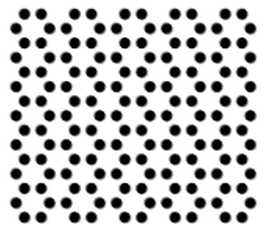

In [38]:
md = mpb.MPBData(rectify=True, periods=5, resolution=32)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)
plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

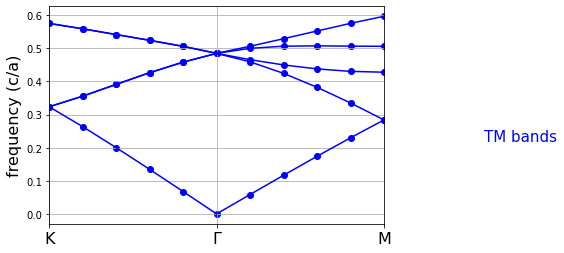

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = range(len(tm_freqs))
# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for xz, tmz in zip(x, tm_freqs):
    ax.scatter([xz]*len(tmz), tmz, color='blue')
    #ax.scatter([xz]*len(tez), tez*math.sqrt(3), color='red', facecolors='none')
ax.plot(tm_freqs, color='blue')
#ax.plot(te_freqs*math.sqrt(3), color='red')
#ax.set_ylim([0.14, 0.38])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
#for gap in tm_gaps:
#    if gap[0] > 1:
#        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(13 , 0.22, 'TM bands', color='blue', size=15)
#ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

points_in_between = (len(tm_freqs) - 3) / 2
tick_locs = [i*points_in_between+i for i in range(3)]
tick_labs = [  'K', 'Γ','M']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()

In [40]:
#第二种超原胞, this result is wrong I can not find why
import math
import meep as mp
from meep import mpb
import matplotlib.pyplot as plt
import numpy as np

num_bands = 5
resolution = 32
a0=np.sqrt(3)
R=1/3*a0
#r=R*1/3
r=0.235
geometry_lattice=mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(1, 0),
                              basis2=mp.Vector3(1, math.sqrt(3))
                              )

geometry = []
#geometry.append(mp.Cylinder(r, center=mp.Vector3((0.5*a0-R)/a0,(0.5*a0-R)/a0), material=mp.Medium(epsilon=11.7)))
#geometry.append(mp.Cylinder(r, center=mp.Vector3(-(0.5*a0-R)/a0,-(0.5*a0-R)/a0), material=mp.Medium(epsilon=11.7)))
geometry.append(mp.Cylinder(r, center=mp.Vector3(0,0), material=mp.Medium(epsilon=11.7)))
geometry.append(mp.Cylinder(r, center=mp.Vector3(1/3,1/3), material=mp.Medium(epsilon=11.7)))
k_points = [
    mp.Vector3(2/3,1/3),  # K
    mp.Vector3(0,0),  # Gamma
    mp.Vector3(0.5,0),  # M
   # mp.Vector3(),  # Gamma
]
k_points = mp.interpolate(4, k_points)

ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands,
    default_material=mp.air
)

fields=[]
def get_efields(ms, band):
    fields.append(ms.get_efield(band, bloch_phase=False))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(0,0), mpb.fix_efield_phase, get_efields))

tm_freqs = ms.all_freqs
tm_gaps = ms.gap_list

converted=[]
for f in fields:    # 三个点这个语法就是前面的若干项都省略不写
    f = f[..., 0, 2]    # f.shape: [nx, ny, nz, 3]，前面3个是网格，第4个参数从0到2是表示Ex Ey Ez
    converted.append(f)
    




Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0.5, 0.866025, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (1, -0.57735, 0)
     (-0, 1.1547, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (0,0,0)
          radius 0.235, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0.333333,0.333333,0)
          radius 0.235, height 1e+20, axis (0, 0, 1)
Geometric object tree has depth 2 and 6 object nodes (vs. 2 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
11 k-points
  Vector3<0.6666666666666666, 0.3333333333333333, 0.0>
  Vector3<0.5333333333333333, 0.26666666666666666, 0.0>
  Vector3<0.39999999999999997, 0.19999999999999998, 0.0>
  Vector3<0.2666666666666666

    iteration   10: trace = 0.8298332345478567 (2.46528e-05% change)
    iteration   11: trace = 0.8298327791266563 (5.48811e-05% change)
    iteration   12: trace = 0.8298278199059742 (0.000597619% change)
    switching back to exact line minimization
    large trace change predicted (0.0325906%)
    linmin: converged after 6 iterations.
    iteration   13: trace = 0.8297556526763067 (0.00869703% change)
    linmin: converged after 4 iterations.
    iteration   14: trace = 0.8297189766107163 (0.0044202% change)
    linmin: converged after 4 iterations.
    iteration   15: trace = 0.8296785069620831 (0.00487763% change)
    linmin: converged after 3 iterations.
    iteration   16: trace = 0.8296752607252931 (0.000391265% change)
    linmin: converged after 3 iterations.
    iteration   17: trace = 0.8296739315317234 (0.000160207% change)
    linmin: converged after 2 iterations.
    iteration   18: trace = 0.82967355142662 (4.58138e-05% change)
    linmin: converged after 2 iterations.

epsilon: 1-11.7, mean 5.28715, harm. mean 1.67228, 47.168% > 1, 40.0668% "fill"
real part range: 1 .. 11.7


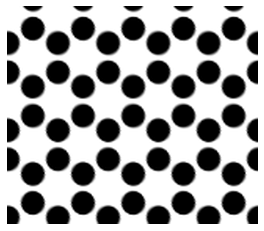

In [41]:
md = mpb.MPBData(rectify=True, periods=5, resolution=32)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)
plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

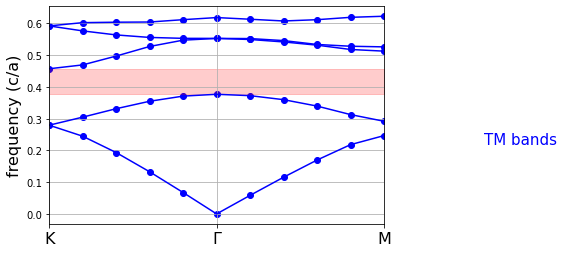

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = range(len(tm_freqs))
# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for xz, tmz in zip(x, tm_freqs):
    ax.scatter([xz]*len(tmz), tmz, color='blue')
    #ax.scatter([xz]*len(tez), tez*math.sqrt(3), color='red', facecolors='none')
ax.plot(tm_freqs, color='blue')
#ax.plot(te_freqs*math.sqrt(3), color='red')
#ax.set_ylim([0.14, 0.38])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
#for gap in tm_gaps:
#    if gap[0] > 1:
#        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(13 , 0.22, 'TM bands', color='blue', size=15)
#ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

points_in_between = (len(tm_freqs) - 3) / 2
tick_locs = [i*points_in_between+i for i in range(3)]
tick_labs = [  'K', 'Γ','M']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()

In [125]:
# 这种超原胞是正方形，对应的到格式也应该是正方形，而不是六边形或菱形，可能有问题
import math
import meep as mp
from meep import mpb
import matplotlib.pyplot as plt
import numpy as np

num_bands = 5
resolution = 32
R=1/2.9
r=1/3*R

geometry_lattice=mp.Lattice(size=mp.Vector3(1, 1),
                              basis1=mp.Vector3(1, 0),
                              basis2=mp.Vector3(0.5, np.sqrt(3)/ 2)
                              )

geometry = []
geometry.append(mp.Cylinder(r, center=mp.cartesian_to_lattice(mp.Vector3(R/2,R*np.sqrt(3)/2), geometry_lattice), material=mp.Medium(epsilon=11.7)))
geometry.append(mp.Cylinder(r, center=mp.cartesian_to_lattice(mp.Vector3(-R/2,R*np.sqrt(3)/2), geometry_lattice), material=mp.Medium(epsilon=11.7)))
geometry.append(mp.Cylinder(r, center=mp.cartesian_to_lattice(mp.Vector3(R,0), geometry_lattice), material=mp.Medium(epsilon=11.7)))
geometry.append(mp.Cylinder(r, center=mp.cartesian_to_lattice(mp.Vector3(-R,0), geometry_lattice), material=mp.Medium(epsilon=11.7)))
geometry.append(mp.Cylinder(r, center=mp.cartesian_to_lattice(mp.Vector3(R/2,-R*np.sqrt(3)/2), geometry_lattice), material=mp.Medium(epsilon=11.7)))
geometry.append(mp.Cylinder(r, center=mp.cartesian_to_lattice(mp.Vector3(-R/2,-R*np.sqrt(3)/2), geometry_lattice), material=mp.Medium(epsilon=11.7)))
#geometry.append(mp.Cylinder(r2, center=mp.Vector3(0,0.3),material=mp.air))
#geometry.append(mp.Cylinder(r3, center=mp.Vector3(0.7,0.3),material=mp.air))
k_points = [
    mp.Vector3(1/3,2/3),  # Gamma
    mp.Vector3(),  # M
    mp.Vector3(0,1/2),  # K
   # mp.Vector3(),  # Gamma
]
k_points = mp.interpolate(4, k_points)

ms = mpb.ModeSolver(
    geometry=geometry,
    geometry_lattice=geometry_lattice,
    k_points=k_points,
    resolution=resolution,
    num_bands=num_bands,
    default_material=mp.air
)
hfields=[]
efields = []
poyntings=[]
def get_efields(ms, band):
    efields.append(ms.get_efield(band))
def get_poynting(ms,band):
    poyntings.append(ms.get_poynting(band))
def get_hfields(ms,band):
    hfields.append(ms.get_hfield(band))

ms.run_tm(mpb.output_at_kpoint(mp.Vector3(), mpb.fix_efield_phase,
          get_efields, mpb.fix_hfield_phase, get_hfields,get_poynting))
    


Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0.5, 0.866025, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (1, -0.57735, 0)
     (-0, 1.1547, -0)
     (0, -0, 1)
Geometric objects:
     cylinder, center = (2.77556e-17,0.344828,0)
          radius 0.114943, height 1e+20, axis (0, 0, 1)
     cylinder, center = (-0.344828,0.344828,0)
          radius 0.114943, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0.344828,0,0)
          radius 0.114943, height 1e+20, axis (0, 0, 1)
     cylinder, center = (-0.344828,0,0)
          radius 0.114943, height 1e+20, axis (0, 0, 1)
     cylinder, center = (0.344828,-0.344828,0)
          radius 0.114943, height 1e+20, axis (0, 0, 1)
     cylinder, center = (-2.77556e-17,-0.344828,0)
          radius 0.114943, height 1e+20, axis

    iteration    5: trace = 0.9015942859713846 (0.000200939% change)
    iteration    6: trace = 0.901593999822932 (3.17381e-05% change)
    iteration    7: trace = 0.9015939666857905 (3.6754e-06% change)
Finished solving for bands 1 to 5 after 7 iterations.
tmfreqs:, 5, 0.0666667, 0.133333, 0, 0.133333, 0.0659322, 0.446006, 0.448941, 0.496787, 0.49998
elapsed time for k point: 0.05178332328796387
solve_kpoint (0,0,0):
Solving for bands 2 to 5...
    linmin: converged after 3 iterations.
    switching to approximate line minimization (decrease time by 66.6723%)
    iteration    1: trace = 0.9071847723103001 (3.56155% change)
    iteration    2: trace = 0.9052340278446869 (0.215264% change)
    iteration    3: trace = 0.9048915354219111 (0.0378418% change)
    iteration    4: trace = 0.9048367019781141 (0.00605985% change)
    iteration    5: trace = 0.9048356097551181 (0.000120709% change)
    iteration    6: trace = 0.9048352007998274 (4.51966e-05% change)
    iteration    7: trace = 

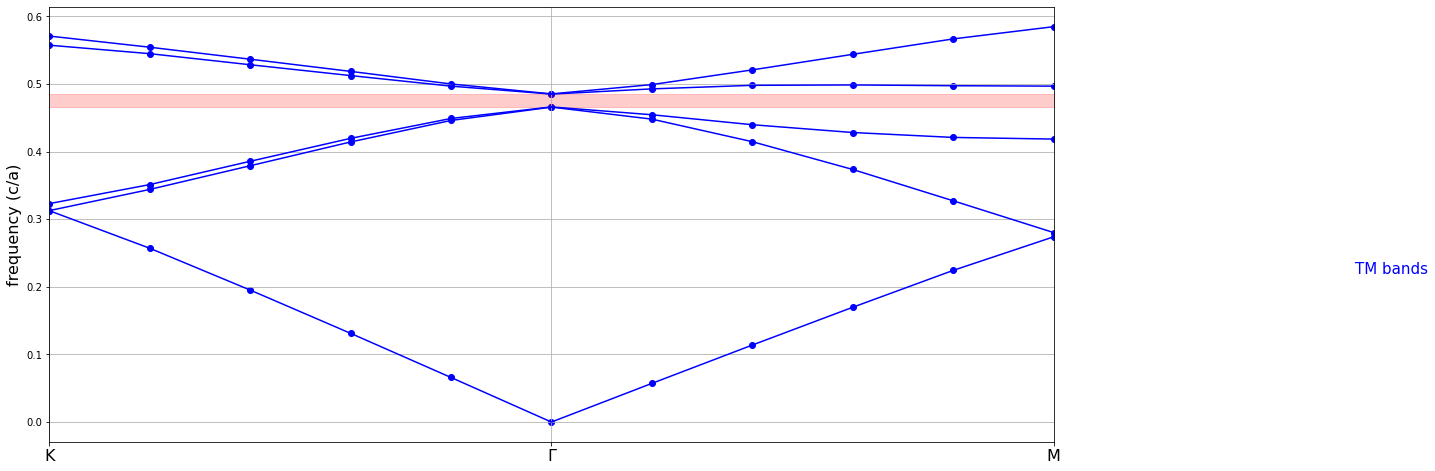

In [126]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = range(len(tm_freqs))
# Plot bands
# Scatter plot for multiple y values, see https://stackoverflow.com/a/34280815/2261298
for xz, tmz in zip(x, tm_freqs):
    ax.scatter([xz]*len(tmz), tmz, color='blue')
    #ax.scatter([xz]*len(tez), tez*math.sqrt(3), color='red', facecolors='none')
ax.plot(tm_freqs, color='blue')
#ax.plot(te_freqs*math.sqrt(3), color='red')
#ax.set_ylim([0.14, 0.38])
ax.set_xlim([x[0], x[-1]])

# Plot gaps
#for gap in tm_gaps:
#    if gap[0] > 1:
#        ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)

for gap in tm_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)


# Plot labels
ax.text(13 , 0.22, 'TM bands', color='blue', size=15)
#ax.text(13.05, 0.235, 'TE bands', color='red', size=15)

points_in_between = (len(tm_freqs) - 3) / 2
tick_locs = [i*points_in_between+i for i in range(3)]
tick_labs = [  'K', 'Γ','M']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)
ax.set_ylabel('frequency (c/a)', size=16)
ax.grid(True)

plt.show()

In [132]:
hfields[1].shape

(32, 32, 1, 3)

In [162]:


eps.shape


epsilon: 1-11.7, mean 4.07692, harm. mean 1.45793, 38.0859% > 1, 28.7563% "fill"


(32, 32)

In [163]:
poyntings1=np.array(poyntings)
# print(poyntings1.shape)
# print(poyntings1)

k=2  #选取能带k
converted3=poyntings1[k,:,:,:,0:2]
# print(converted3.shape)
# print(converted3)

x,y=np.meshgrid(np.linspace(0,31,32),np.linspace(0,31,32))
# print(x)
# print(y)

a0=[]
b0=[]
plt.figure(figsize=(10,10))#放大图像尺寸
plt.contour(converted_eps.T, cmap='binary',alpha=0.4)
n0=15
for n in range(32):
    for m in range(0,32,1):
        a=converted3[n,m,0,0].real
        b=converted3[n,m,0,1].real
        a0.append(a)
        b0.append(b)
plt.quiver(x,y,a0,b0,scale=0.007)#scale越小，放大比例越大




real part range: 1 .. 11.7


(32, 28)

epsilon: 1-11.7, mean 4.07692, harm. mean 1.45793, 38.0859% > 1, 28.7563% "fill"
real part range: 1 .. 11.7
real part range: -1.7237 .. 1.7237
real part range: -1.85371 .. 1.85371


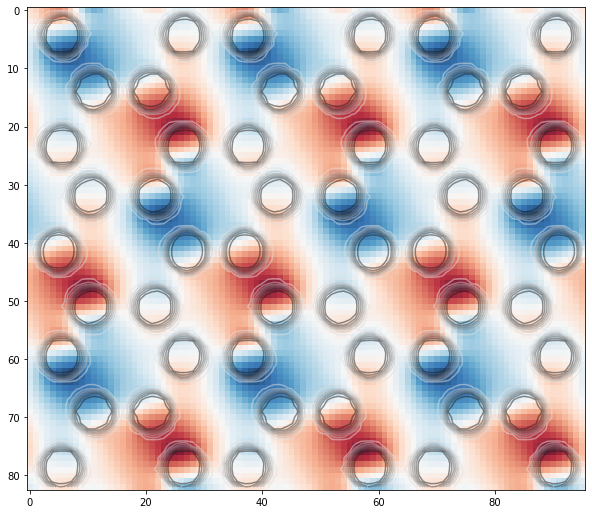

In [217]:
nn=3
md = mpb.MPBData(rectify=True,resolution=32, periods=nn)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)
s,t=np.meshgrid(np.linspace(0,32*nn-1,32*nn),np.linspace(0,28*nn-2,28*nn-1))
#hfields=np.array(hfields)
d0=[]
p0=[]
k=2

hx=hfields[k][...,0].real
hy=hfields[k][...,1].real
converted_hx=md.convert(hx[...,0])
converted_hy=md.convert(hy[...,0])
plt.figure(figsize=(10,10))
plt.contour(converted_eps.T,cmap='binary', alpha=0.5)
plt.imshow(converted_hx.T, cmap='RdBu',alpha=0.9)
for n in range(32*nn):
    for m in range(28*nn-1):
        d=converted_hx[n,m]
        
        p=converted_hy[n,m]
        
        d0.append(d)
        p0.append(p)      
#plt.quiver(s,t,d0,p0)#,headwidth=5,scale=10)

In [186]:
hfields.shape

(5, 32, 32, 1, 3)

In [195]:
converted_hx.shape

(96, 83)

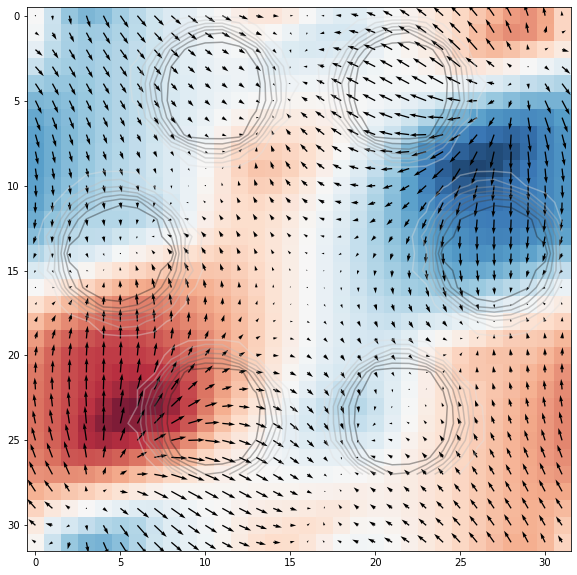

In [190]:
hfields=np.array(hfields)
d0=[]
p0=[]
plt.figure(figsize=(10,10))
s,t=np.meshgrid(np.linspace(0,31,32),np.linspace(0,31,32))
plt.contour(converted_eps.T, cmap='binary',alpha=0.4)
for n in range(0,32,1):
    for m in range(0,32,1):
        d=hfields[2,n,m,0,0]
        d=d.real
        p=hfields[2,n,m,0,1]
        p=p.real
        d0.append(d)
        p0.append(p)      
plt.imshow(hfields[2,:,:,0,0].T.real, cmap='RdBu',alpha=0.9)
plt.quiver(s,t,d0,p0)#,headwidth=5,scale=10)

real part range: 0 .. 0
imag part range: 0 .. 0
real part range: -0.86065 .. 0.865371
imag part range: -6.35753e-05 .. 6.35753e-05
real part range: -0.523973 .. 0.980176
imag part range: -7.18377e-05 .. 7.18377e-05
real part range: -0.974542 .. 0.974542
imag part range: -7.84082e-05 .. 7.93323e-05
real part range: -0.870116 .. 0.870116
imag part range: -0.000136315 .. 0.000149751


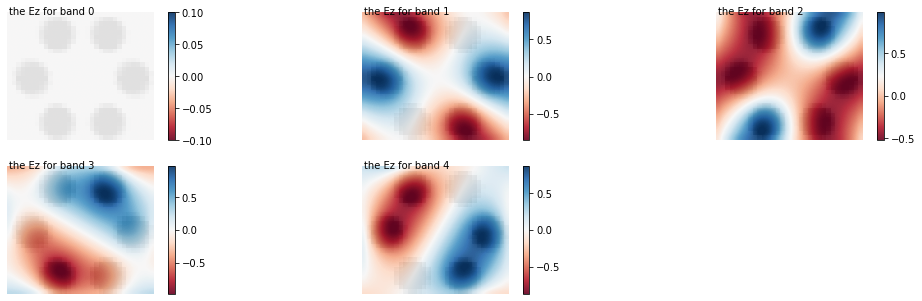

In [129]:
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (18.0, 8.0) # 调整显示大小
converted = []
for f in efields:
    f = f[..., 0, 2]
    converted.append(md.convert(f))
for i, f in enumerate(converted):
    plt.subplot(334 + i)
    plt.imshow(converted_eps.T, cmap='binary',alpha=0.8);
    plt.imshow(np.real(f.T), interpolation='spline36', cmap='RdBu', alpha=0.9);
    plt.text(0,0,'the Ez for band {}'.format(i))
    plt.colorbar()
    plt.axis('off')

real part range: 0 .. 0
imag part range: 0 .. 0
real part range: -1.71914 .. 1.71914
imag part range: -0.00348559 .. 0.00754335
real part range: -1.71071 .. 1.71071
imag part range: -0.00473457 .. 0.00389768
real part range: -1.19766 .. 2.06541
imag part range: -0.00160108 .. 0.00160108
real part range: -1.88195 .. 1.20326
imag part range: -0.00259245 .. 0.00259245


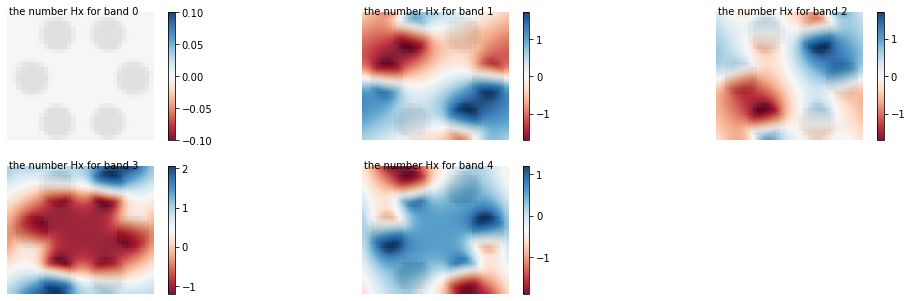

In [130]:
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (18.0, 8.0) # 调整显示大小
converted2 = []
for f in hfields:
    f = f[..., 0, 0]
    converted2.append(md.convert(f))
plt.figure()
for i, f in enumerate(converted2):
    plt.subplot(334 + i)
    plt.imshow(converted_eps.T, cmap='binary',alpha=0.8)
    plt.imshow(np.real(f.T), interpolation='spline36', cmap='RdBu', alpha=0.9)
    plt.text(0,0,'the number Hx for band {}'.format(i))
    plt.colorbar()
    plt.axis('off')

real part range: 1.07457 .. 1.07457
imag part range: 0 .. 0
real part range: -1.39502 .. 1.39502
imag part range: -0.00588685 .. 0.00603569
real part range: -1.81005 .. 1.81005
imag part range: -0.00375809 .. 0.00396153
real part range: -1.028 .. 1.51633
imag part range: -0.000470333 .. 0.000470333
real part range: -1.26924 .. 2.05996
imag part range: -0.00083834 .. 0.00083834


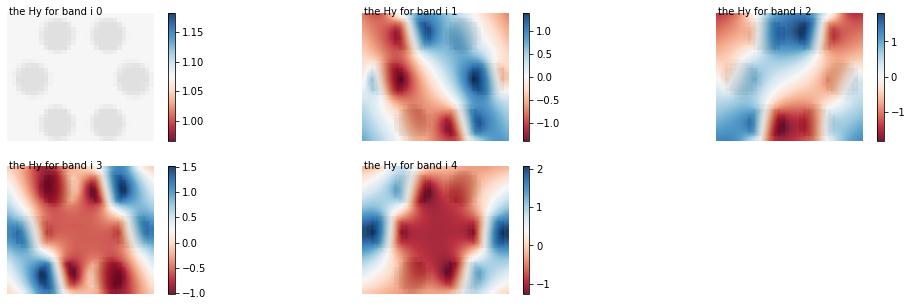

In [131]:
converted3 = []
for f in hfields:
    f = f[..., 0, 1]
    converted3.append(md.convert(f))
plt.figure()
for i, f in enumerate(converted3):
    plt.subplot(334 + i)
    plt.imshow(converted_eps.T, cmap='binary',alpha=0.8)
    plt.imshow(np.real(f.T), interpolation='spline36', cmap='RdBu', alpha=0.9)
    plt.text(0,0,'the Hy for band i {}'.format(i))
    plt.colorbar()
    plt.axis('off')

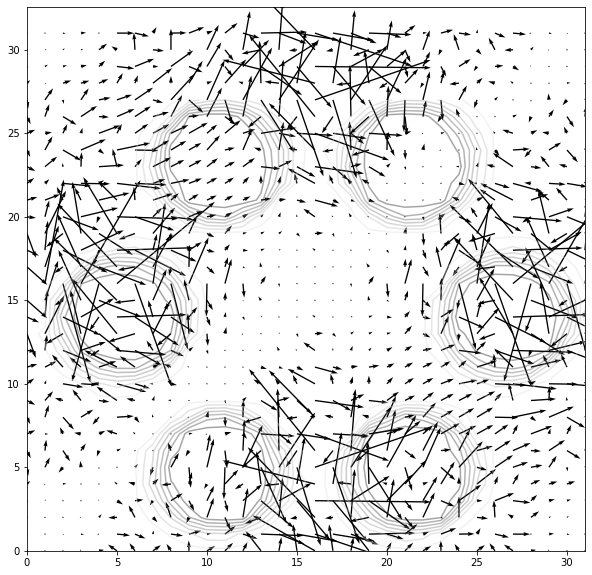

In [101]:

hfields=np.array(hfields)
efields=np.array(efields)
poyntings2= np.zeros(shape=(5,32,32,2))##COMsol公式求poyntings
for i in range(5):
    for j in range(32):
        for k in range(32):
            x=-np.conj(hfields[i,j,k,0,2])*efields[i,j,k,0,1]+np.conj(hfields[i,j,k,0,1])*efields[i,j,k,0,2]
            x=x.real/2
            y=-np.conj(hfields[i,j,k,0,0])*efields[i,j,k,0,2]+np.conj(hfields[i,j,k,0,2])*efields[i,j,k,0,0]
            y=y.real/2
            poyntings2[i,j,k,0]=x
            poyntings2[i,j,k,1]=y

a0=[]
b0=[]
plt.figure(figsize=(10,10))
plt.contour(converted_eps.T, cmap='binary',alpha=0.4)
for n in range(0,32,1):
    for m in range(0,32,1):
        a=poyntings2[2,n,m,0]
        b=poyntings2[2,n,m,1]
        a0.append(a)
        b0.append(b)
plt.quiver(s,t,a0,b0, scale=0.009)


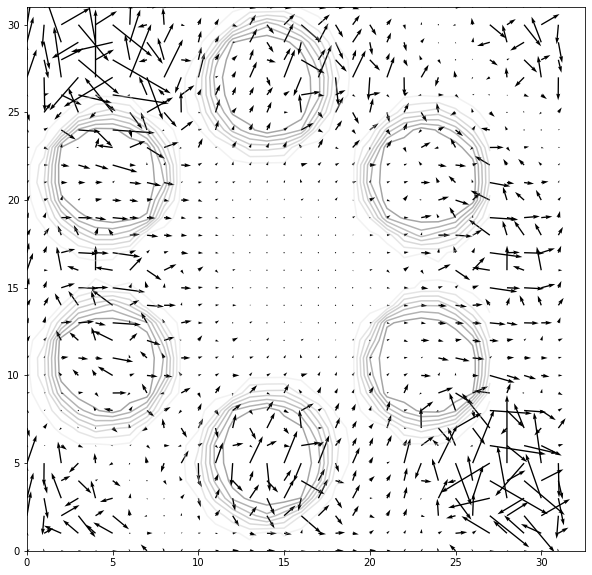

In [121]:
poyntings1=np.array(poyntings)
# print(poyntings1.shape)
# print(poyntings1)

k=3  #选取能带k
converted3=poyntings1[k,:,:,:,0:2]
# print(converted3.shape)
# print(converted3)

x,y=np.meshgrid(np.linspace(0,31,32),np.linspace(0,31,32))
# print(x)
# print(y)

a0=[]
b0=[]
plt.figure(figsize=(10,10))#放大图像尺寸
plt.contour(converted_eps, cmap='binary',alpha=0.4)
n0=15
for n in range(32):
    for m in range(0,32,1):
        a=converted3[n,m,0,0].real
        b=converted3[n,m,0,1].real
        a0.append(a)
        b0.append(b)
plt.quiver(x,y,a0,b0,scale=0.05)#scale越小，放大比例越大